In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


PROJET 6 : Analysez les ventes d'une librairie aveC Python : Lapage

I - 1) Import des fichiers et visualisation des dataframes

In [3]:
clients = pd.read_csv('customers.csv', sep= ';')
produits = pd.read_csv('products.csv', sep= ';')
transactions = pd.read_csv('transactions.csv', sep= ';')

In [4]:
display(clients)
display(produits)
display(transactions)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


Procédons tout d'abord à l'analyse et le potentiel nettoyage de nos dataframes

I - 2) Nettoyage et vérifications

a) Analyse du dataframe 'clients'

In [13]:
#Observation de la table clients
display(clients.head(5))
display(clients.shape)
display(clients.dtypes)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


(8621, 3)

client_id    object
sex          object
birth         int64
dtype: object

In [8]:
#Test des doublons sur client_id et affichage
doublons_clients = clients.duplicated(subset=['client_id']).sum()

display('Doublons dans les id clients : {:}'.format(doublons_clients))

'Doublons dans les id clients : 0'

In [9]:
#Affichage des valeurs manquantes
valeurs_manquantes_clients = clients.isnull().sum()
display('Valeurs manquantes par colonne :\n{:}'.format(valeurs_manquantes_clients))

'Valeurs manquantes par colonne :\nclient_id    0\nsex          0\nbirth        0\ndtype: int64'

Pas de doublons & valeurs manquantes, on peut passer à l'analyse du dataframe 'produits'.

b) Analyse du dataframe 'produits'

In [10]:
#Observation de la table produits
display(produits.head(5))
display(produits.shape)
display(produits.dtypes)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


(3286, 3)

id_prod     object
price      float64
categ        int64
dtype: object

In [41]:
#Test des doublons sur id_prod et affichage
doublons_produits = produits.duplicated(subset=['id_prod']).sum()

display('Doublons dans les id produits : {:}'.format(doublons_produits))

'Doublons dans les id produits : 0'

In [42]:
#Affichage des valeurs manquantes
valeurs_manquantes_produits = produits.isnull().sum()
display('Valeurs manquantes par colonne :\n{:}'.format(valeurs_manquantes_produits))

'Valeurs manquantes par colonne :\nid_prod    0\nprice      0\ncateg      0\ndtype: int64'

In [43]:
#Descriptif d'erp
produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Pas de doublons & valeurs manquantes non plus, et pas d'autres anomalies (ex : prix négatifs). On peut passer à l'analyse du
dataframe 'transactions'.

c) Analyse du dataframe 'transactions'et vérification des clés primaires.

In [44]:
#Observation de la table transactions
display(transactions.head(5))
display(transactions.shape)
display(transactions.dtypes)

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


(687534, 4)

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [15]:
#Nombre de produits distincts
display(transactions["id_prod"].nunique())

#Nombre de sessions d'achat/vente distinctes
display(transactions["session_id"].nunique())

#Nombre de sessions clients distincts
display(transactions["client_id"].nunique())

3265

345505

8600

In [20]:
#Affichage des valeurs manquantes
valeurs_manquantes_transac = transactions.isnull().sum()
display('Valeurs manquantes par colonne :\n{:}'.format(valeurs_manquantes_transac))

'Valeurs manquantes par colonne :\nid_prod       0\ndate          0\nsession_id    0\nclient_id     0\ndtype: int64'

Nous avons une idée du nombre de clients, du nombre d'id sessions et du nombre de produits. Il est bien évidemment inutile de vérifier des doublons pour des id produits.

On a pu avoir notre idée des clés primaires en visualisant nos dataframes, mais on vérifie par précaution.

In [3]:
#Analyse de la clé primaire clients-transactions
primary_key = set(clients.columns).intersection(set(transactions.columns))

if len(primary_key) == 1:
    primary_key = primary_key.pop()
    display(f"Clé primaire : {primary_key}")
else:
    display("Aucune clé primaire")

'Clé primaire : client_id'

In [4]:
#Analyse de la clé primaire produits-transactions
primary_key = set(produits.columns).intersection(set(transactions.columns))

if len(primary_key) == 1:
    primary_key = primary_key.pop()
    display(f"Clé primaire : {primary_key}")
else:
    display("Aucune clé primaire")

'Clé primaire : id_prod'

Nous pouvons passer aux jointures.

I - 3) Jointures et ajustements

In [5]:
#Jointure des df transactions et clients
clitransac = pd.merge(transactions, clients, how='left', on='client_id')

#Jointure des 3 dataframes
lapage = pd.merge(clitransac, produits, how='inner', on='id_prod')

#Vue rapide sur le dataframe final 'lapage'
display(lapage.nunique())
display(lapage.describe())
display(lapage)

id_prod         3265
date          687419
session_id    345505
client_id       8600
sex                2
birth             76
price           1442
categ              3
dtype: int64

,birth,price,categ
count,687534.000000,687534.000000,687534.000000
mean,1977.817391,17.493918,0.448789
std,13.607935,18.238337,0.594563
min,1929.000000,0.620000,0.000000
25%,1970.000000,8.990000,0.000000
50%,1980.000000,13.990000,0.000000
75%,1987.000000,19.080000,1.000000
max,2004.000000,300.000000,2.000000


,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,m,1965,11.99,0
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,f,1984,11.99,0
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,f,1980,11.99,0
...,...,...,...,...,...,...,...,...
687529,0_1576,2022-10-20 21:09:34.520763,s_285542,c_7954,m,1973,2.29,0
687530,0_433,2022-02-21 06:11:31.176502,s_168499,c_8069,f,1975,2.99,0
687531,0_433,2022-06-21 06:11:31.176502,s_226925,c_8069,f,1975,2.99,0
687532,0_433,2022-08-21 06:11:31.176502,s_256286,c_8069,f,1975,2.99,0


In [18]:
#Vérification : clients passifs
clients_passifs=lapage[(lapage['id_prod'].isnull())&(lapage['session_id'].isnull())]
display(clients_passifs)

,id_prod,date,session_id,client_id,sex,birth,price,categ


Pas de clients passifs, on peut continuer.

,id_prod,date,session_id,client_id,sex,birth,price,categ,datetime,year,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,2021-03-01,2021,54
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,m,1965,11.99,0,2021-03-01,2021,56
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0,2021-03-01,2021,41
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,f,1984,11.99,0,2021-03-01,2021,37
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,f,1980,11.99,0,2021-03-01,2021,41
...,...,...,...,...,...,...,...,...,...,...,...
687529,0_1576,2022-10-20 21:09:34.520763,s_285542,c_7954,m,1973,2.29,0,2022-10-01,2022,49
687530,0_433,2022-02-21 06:11:31.176502,s_168499,c_8069,f,1975,2.99,0,2022-02-01,2022,47
687531,0_433,2022-06-21 06:11:31.176502,s_226925,c_8069,f,1975,2.99,0,2022-06-01,2022,47
687532,0_433,2022-08-21 06:11:31.176502,s_256286,c_8069,f,1975,2.99,0,2022-08-01,2022,47


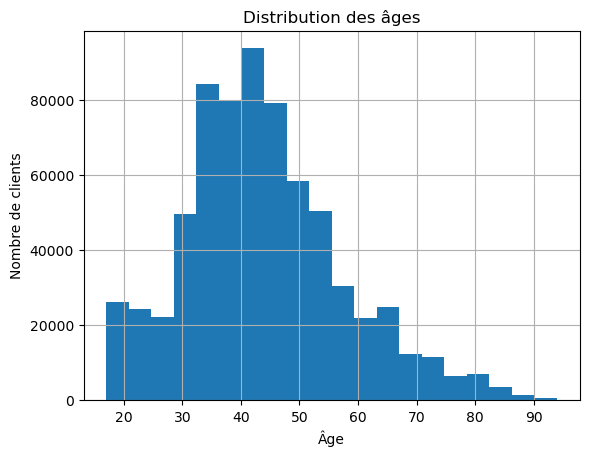

L'âge minimum est de : 17
L'âge maximum est de : 94


In [6]:
#Création d'une nouvelle variable 'datetime' pour avoir les mois et conversion en format date
lapage['datetime'] = lapage['date'].str[0:7]
lapage['datetime'] = pd.to_datetime(lapage['datetime'])

#Calcul de l'âge des clients et ajout de la variable sur le dataframe lapage
lapage['year'] = lapage['datetime'].dt.strftime('%Y')
lapage["year"] = pd.to_numeric(lapage["year"])
lapage["birth"] = pd.to_numeric(lapage["birth"])
lapage['age'] = lapage['year'] - lapage['birth']

#Afficher le dataframe
display(lapage)

#Examiner la distribution des âges
lapage['age'].hist(bins=20)  
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

#Age minimum + max
age_minimum = lapage['age'].min()
age_maximum = lapage['age'].max()
print("L'âge minimum est de :", age_minimum)
print("L'âge maximum est de :", age_maximum)

,age,panier_moyen
0,17,39.578273
1,18,39.675845
2,19,40.562706
3,20,39.473475
4,21,39.464341
...,...,...
73,90,16.930165
74,91,16.632297
75,92,16.942183
76,93,16.400155


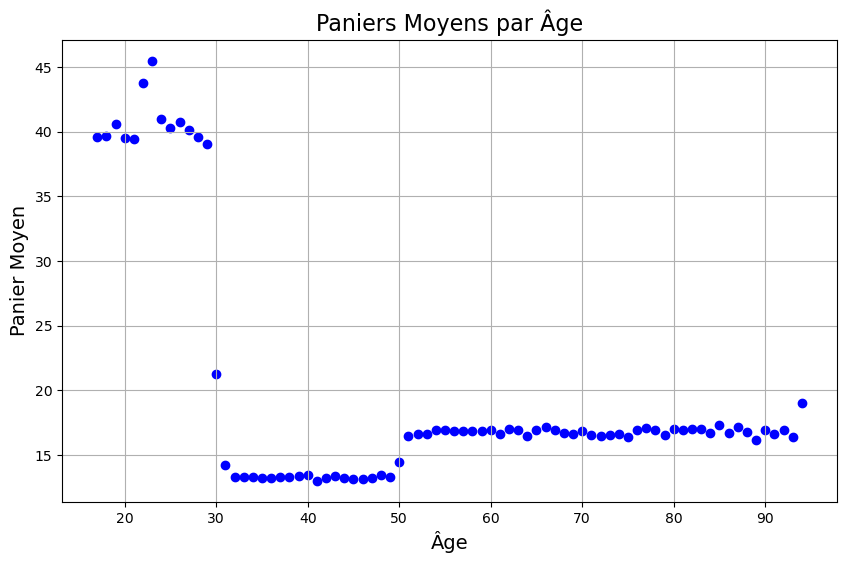

In [22]:
#Calcul des paniers moyens par groupe d'âge
panier_moyen_age = lapage.groupby('age')['price'].mean().reset_index()

#Renommer les colonnes
panier_moyen_age.columns = ['age', 'panier_moyen']

#Afficher le DataFrame des paniers moyens par âge
display(panier_moyen_age)

#Données des paniers moyens par âge
ages = panier_moyen_age['age']
paniers_moyens = panier_moyen_age['panier_moyen']

#Tracer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(ages, paniers_moyens, marker='o', linestyle='-', color='b')

#Ajouter des titres et des labels
plt.title('Paniers Moyens par Âge', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Panier Moyen', fontsize=14)

#Afficher le graphique
plt.grid(True)
plt.show()

Il est clair que l'observation des paniers moyens par âge, nous permets de déterminer trois groupes d'âges +- homogènes : les 17-30 ans, les 31-50 ans, et les 51+ (jusqu'à 94).

In [7]:
#Définir lestranches d'âge
bins = [0, 30, 50, lapage['age'].max()]

#Étiquettes pour les tranches d'âge
labels = ['Jeunes (17-30)', 'Adultes (31-50)', 'Âgés (51+)']

#Ajouter une colonne 'tranche_age' à ton DataFrame
lapage['tranche_age'] = pd.cut(lapage['age'], bins=bins, labels=labels, right=False)

#Afficher le DataFrame avec les nouvelles tranches d'âge
display(lapage[['age', 'tranche_age']])

#Afficher toutes les catégories de tranches d'âge
categories_uniques = lapage['tranche_age'].unique()
display(categories_uniques)

,age,tranche_age
0,54,Âgés (51+)
1,56,Âgés (51+)
2,41,Adultes (31-50)
3,37,Adultes (31-50)
4,41,Adultes (31-50)
...,...,...
687529,49,Adultes (31-50)
687530,47,Adultes (31-50)
687531,47,Adultes (31-50)
687532,47,Adultes (31-50)


['Âgés (51+)', 'Adultes (31-50)', 'Jeunes (17-30)', NaN]
Categories (3, object): ['Jeunes (17-30)' < 'Adultes (31-50)' < 'Âgés (51+)']

Si les paniers moyens sont de loin les plus élevé chez les 17-30 ans, il est notable que concernant la fréquence d'achat, c'est les 31-50 ans qui l'emportent haut la main.

In [8]:
#On affiche le dataframe pour voir ce que ça donne
display(lapage)

,id_prod,date,session_id,client_id,sex,birth,price,categ,datetime,year,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,2021-03-01,2021,54,Âgés (51+)
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,m,1965,11.99,0,2021-03-01,2021,56,Âgés (51+)
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0,2021-03-01,2021,41,Adultes (31-50)
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,f,1984,11.99,0,2021-03-01,2021,37,Adultes (31-50)
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,f,1980,11.99,0,2021-03-01,2021,41,Adultes (31-50)
...,...,...,...,...,...,...,...,...,...,...,...,...
687529,0_1576,2022-10-20 21:09:34.520763,s_285542,c_7954,m,1973,2.29,0,2022-10-01,2022,49,Adultes (31-50)
687530,0_433,2022-02-21 06:11:31.176502,s_168499,c_8069,f,1975,2.99,0,2022-02-01,2022,47,Adultes (31-50)
687531,0_433,2022-06-21 06:11:31.176502,s_226925,c_8069,f,1975,2.99,0,2022-06-01,2022,47,Adultes (31-50)
687532,0_433,2022-08-21 06:11:31.176502,s_256286,c_8069,f,1975,2.99,0,2022-08-01,2022,47,Adultes (31-50)


On peut passer aux calculs et observations.

II PARTIE CALCULS

II - 1) CHIFFRE D'AFFAIRE

In [9]:
#Calcul du chiffre d'affaire total
CA = lapage['price'].sum()
CA = round(CA, 2)
print("Le chiffre d'affaire en euro est de :", CA)

Le chiffre d'affaire en euro est de : 12027663.1


"Evolution du chiffre d'affaire par mois :"

,datetime,price
0,2021-03-01,482440.61
1,2021-04-01,476109.30
2,2021-05-01,492943.47
3,2021-06-01,484088.56
4,2021-07-01,482835.40
5,2021-08-01,482284.79
6,2021-09-01,507240.68
7,2021-10-01,494733.16
8,2021-11-01,516167.73
9,2021-12-01,525917.28


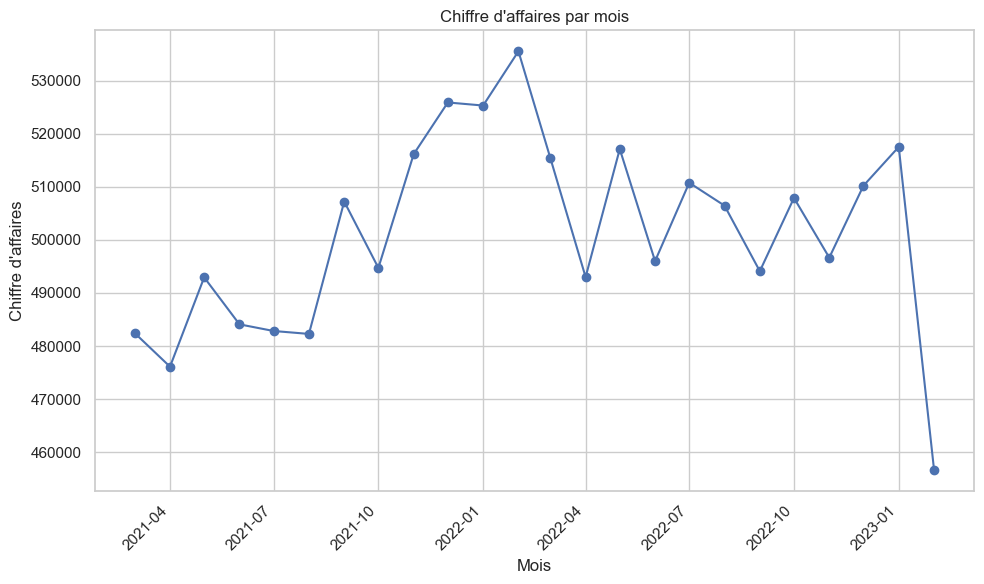

In [33]:
#CA PAR MOIS
ca_mois = lapage.groupby(['datetime'])['price'].sum().reset_index()
display("Evolution du chiffre d'affaire par mois :", ca_mois)

#Convertir la colonne 'datetime' en type datetime (si elle n'est pas déjà convertie)
ca_mois['datetime'] = pd.to_datetime(ca_mois['datetime'])

#Trier le DataFrame par date
ca_mois = ca_mois.sort_values(by='datetime')

#Afficher le chiffre d'affaires par mois sous forme de graphique en courbes
plt.figure(figsize=(10, 6))
plt.plot(ca_mois['datetime'], ca_mois['price'], marker='o', linestyle='-', color='b')

#Espacer les marqueurs de date sur l'axe x
plt.xticks(rotation=45, ha='right')

plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires par mois')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#Sélection des données pour chaque mois
septembre_2021_data = lapage[(lapage['datetime'] >= '2021-09-01') & (lapage['datetime'] < '2021-10-01')]
octobre_2021_data = lapage[(lapage['datetime'] >= '2021-10-01') & (lapage['datetime'] < '2021-11-01')]
novembre_2021_data = lapage[(lapage['datetime'] >= '2021-11-01') & (lapage['datetime'] < '2021-12-01')]

#Comparaison du chiffre d'affaires total
ca_septembre = septembre_2021_data['price'].sum()
ca_octobre = octobre_2021_data['price'].sum()
ca_novembre = novembre_2021_data['price'].sum()

#Comparaison du nombre de clients
clients_septembre = septembre_2021_data['client_id'].nunique()
clients_octobre = octobre_2021_data['client_id'].nunique()
clients_novembre = novembre_2021_data['client_id'].nunique()

#Affichage des résultats
print("Chiffre d'affaires en septembre 2021 :", ca_septembre)
print("Chiffre d'affaires en octobre 2021 :", ca_octobre)
print("Chiffre d'affaires en novembre 2021 :", ca_novembre)
print("\nNombre de clients en septembre 2021 :", clients_septembre)
print("Nombre de clients en octobre 2021 :", clients_octobre)
print("Nombre de clients en novembre 2021 :", clients_novembre)

Chiffre d'affaires en septembre 2021 : 507240.68
Chiffre d'affaires en octobre 2021 : 494733.16000000003
Chiffre d'affaires en novembre 2021 : 516167.73

Nombre de clients en septembre 2021 : 5693
Nombre de clients en octobre 2021 : 6190
Nombre de clients en novembre 2021 : 5875


Par curiosité en observant les courbes, je me suis intéressé au mois d'octobre 2021 : ayant été de loin le plus prolifique en terme d'achat clients, et paradoxalement, le moins rentable si on s'appuye sur le chiffre d'affaire.

C:\Users\djaba\AppData\Local\Temp\ipykernel_316\17211148.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


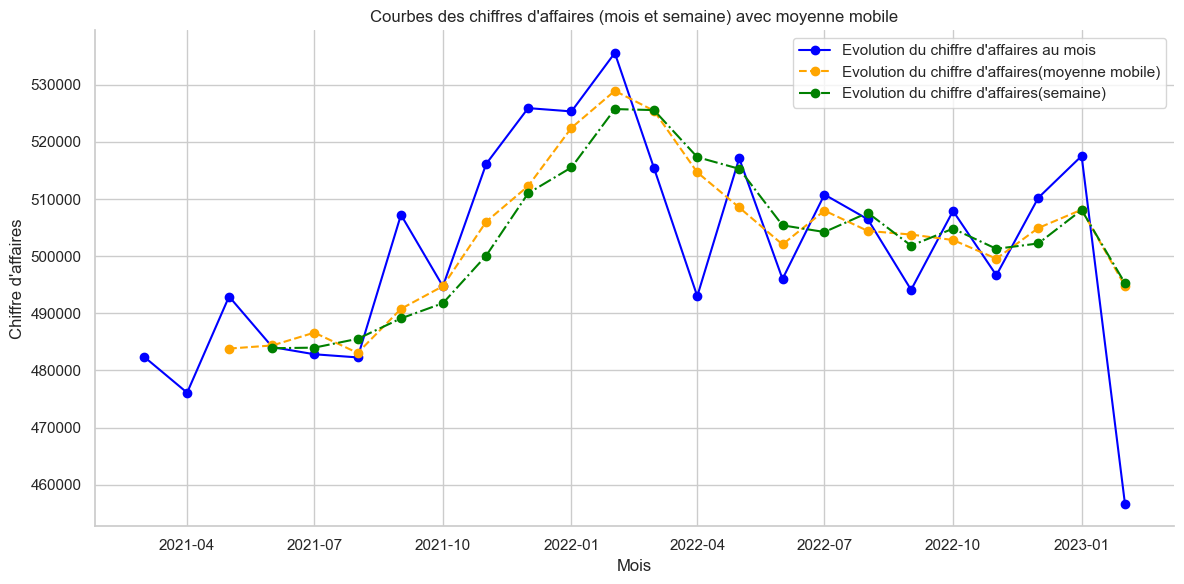

In [36]:
import statsmodels.api as sm

#Moyenne mobile sur 3 mois
moy_mobile = ca_mois["price"].rolling(window=3).mean()
moy_mobile = np.around(moy_mobile, 2)

#Moyenne par semaine
moy_semaine = ca_mois.groupby('datetime')['price'].mean().rolling(window=4).mean()
moy_semaine = np.around(moy_semaine, 2)

#Créer le graphique pour le chiffre d'affaires mensuel, la moyenne mobile et la moyenne par semaine
plt.figure(figsize=(12, 6))
plt.plot(ca_mois['datetime'], ca_mois['price'], label='Evolution du chiffre d\'affaires au mois', marker='o', color='blue')
plt.plot(ca_mois['datetime'], moy_mobile, label='Evolution du chiffre d\'affaires(moyenne mobile)', linestyle='--', color='orange', marker='o')
plt.plot(ca_mois['datetime'], moy_semaine, label='Evolution du chiffre d\'affaires(semaine)', linestyle='-.', color='green', marker='o')

plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires')
plt.title('Courbes des chiffres d\'affaires (mois et semaine) avec moyenne mobile')
plt.legend()
plt.grid(True)

#Améliorer le style
plt.tight_layout()
plt.style.use('seaborn-whitegrid')

#Supprimer la bordure supérieure et droite
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

On observe une période initiale de stagnation jusqu'à février 2022, suivie d'un changement de tendance. Pendant la majeure partie de la période, la moyenne mobile reste en dessous de la courbe mensuelle, suggérant une tendance générale à la baisse. Cependant, à partir de février 2022, la moyenne mobile passe au-dessus de la courbe mensuelle lors des phases de baisse et en dessous lors des phases de hausse.

La moyenne hebdomadaire, quant à elle, prend le dessus sur la courbe mensuelle à partir de février 2022 et sur la moyenne mobile à partir de mars 2022. Elle reste globalement au-dessus par la suite, avec quelques exceptions liées aux fluctuations de la moyenne mobile et aux variations plus prononcées de la courbe mensuelle.

Cette évolution suggère une période d'adaptation dynamique de l'entreprise, caractérisée par des ajustements rapides aux changements du marché. La montée constante de la moyenne hebdomadaire indique une croissance soutenue à court terme, probablement attribuable à des stratégies hebdomadaires efficaces. Cependant, des analyses plus approfondies, en tenant compte des contextes spécifiques et des retours clients, sont nécessaires pour éclairer davantage les décisions à venir.

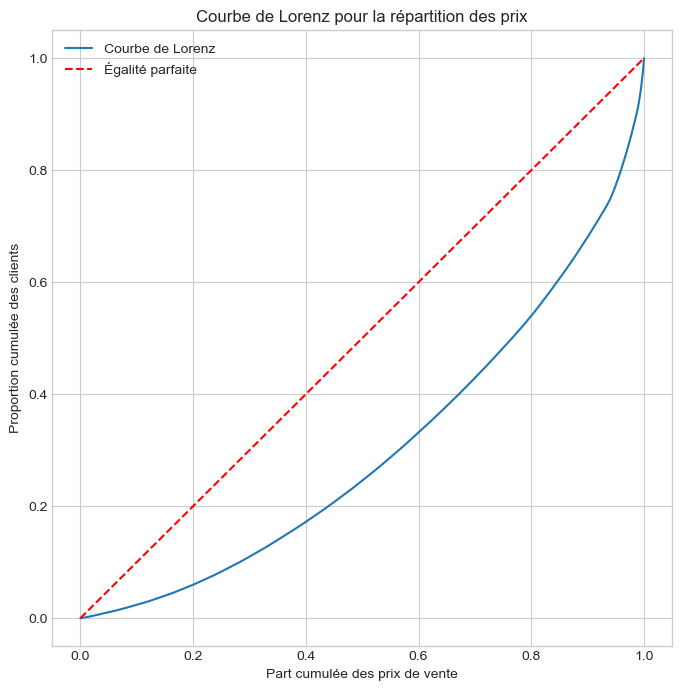

In [27]:
#COURBE DE LORENZ

#Prix par ordre croissant
sorted_prices = np.sort(lapage['price'])

#Calculer les fréquences cumulatives relatives
cumulative_freq = np.cumsum(sorted_prices) / np.sum(sorted_prices)

#Calculer le pourcentage cumulé des prix
cumulative_percentage = np.linspace(0, 1, len(sorted_prices))

#Tracé de la courbe
plt.figure(figsize=(8, 8))
plt.plot(cumulative_percentage, cumulative_freq, label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Égalité parfaite')
plt.title('Courbe de Lorenz pour la répartition des prix')
plt.xlabel('Part cumulée des prix de vente')
plt.ylabel('Proportion cumulée des clients')
plt.legend()
plt.show()

La courbe de Lorenz ici indique une ou des inégalités dans la répartition des prix. En d'autres termes, une partie de la population (en termes de prix) possède une proportion plus élevée que sa part équitable parfaite.


Top et flops


,id_prod,nombre_de_ventes
2591,1_369,2340
2644,1_417,2269
2641,1_414,2246
2733,1_498,2202
2653,1_425,2163
...,...,...
1792,0_549,1
2166,0_886,1
549,0_1498,1
1784,0_541,1


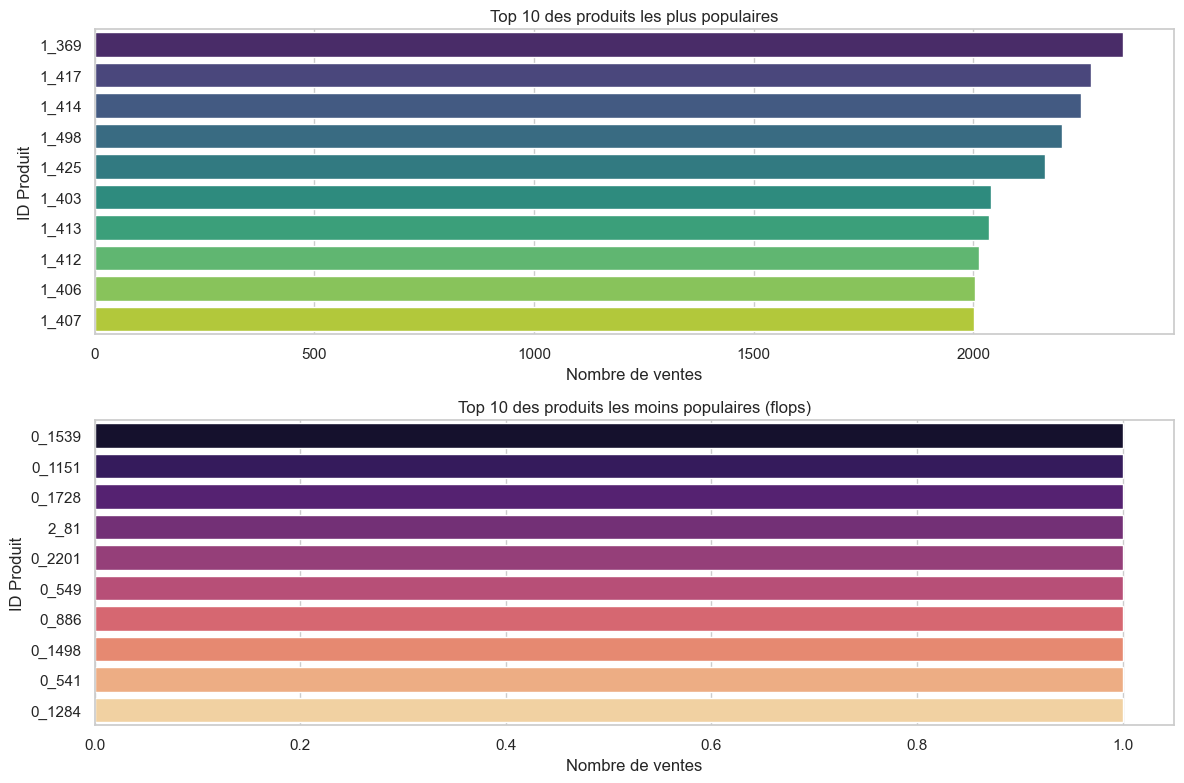

In [8]:
#Identification des tops et des flops
topflop = lapage.groupby(['id_prod']).size().reset_index(name='nombre_de_ventes').sort_values('nombre_de_ventes', ascending=False)

#Top 10 des produits les plus populaires (tops)
top_10_top = topflop.head(10)

#Top 10 des produits les moins populaires (flops)
top_10_flop = topflop.tail(10)

print("\nTop et flops")
display(topflop)

#Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

#Création du subplot pour les tops
plt.subplot(2, 1, 1)
sns.barplot(x="nombre_de_ventes", y="id_prod", data=top_10_top, palette="viridis")
plt.title("Top 10 des produits les plus populaires")
plt.xlabel("Nombre de ventes")
plt.ylabel("ID Produit")

#Création du subplot pour les flops
plt.subplot(2, 1, 2)
sns.barplot(x="nombre_de_ventes", y="id_prod", data=top_10_flop, palette="magma")
plt.title("Top 10 des produits les moins populaires (flops)")
plt.xlabel("Nombre de ventes")
plt.ylabel("ID Produit")

#Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

#Affichage du graphique
plt.show()

In [30]:
#Merge avec le DataFrame lapage pour obtenir les informations complètes sur les produits
topflop_details = pd.merge(topflop, lapage[['id_prod', 'age', 'sex', 'categ','client_id', 'tranche_age']], on='id_prod', how='left')

#Afficher les détails pour les tops
display(topflop_details.head(10))
display(topflop_details.tail(10))

,id_prod,nombre_de_ventes,age,sex,categ,client_id,tranche_age
0,1_369,2340,31,m,1,c_8303,Adultes (31-50)
1,1_369,2340,64,m,1,c_7621,Âgés (51+)
2,1_369,2340,59,f,1,c_4685,Âgés (51+)
3,1_369,2340,27,m,1,c_6555,Jeunes (17-30)
4,1_369,2340,57,m,1,c_3035,Âgés (51+)
5,1_369,2340,42,f,1,c_1570,Adultes (31-50)
6,1_369,2340,56,f,1,c_203,Âgés (51+)
7,1_369,2340,63,f,1,c_5163,Âgés (51+)
8,1_369,2340,34,f,1,c_1855,Adultes (31-50)
9,1_369,2340,47,f,1,c_2131,Adultes (31-50)


,id_prod,nombre_de_ventes,age,sex,categ,client_id,tranche_age
687524,0_1539,1,33,f,0,c_881,Adultes (31-50)
687525,0_1151,1,48,f,0,c_2103,Adultes (31-50)
687526,0_1728,1,32,f,0,c_2768,Adultes (31-50)
687527,2_81,1,29,m,2,c_7616,Jeunes (17-30)
687528,0_2201,1,36,m,0,c_1261,Adultes (31-50)
687529,0_549,1,34,f,0,c_4202,Adultes (31-50)
687530,0_886,1,55,f,0,c_7219,Âgés (51+)
687531,0_1498,1,43,f,0,c_1938,Adultes (31-50)
687532,0_541,1,36,f,0,c_1869,Adultes (31-50)
687533,0_1284,1,49,m,0,c_1551,Adultes (31-50)


In [28]:
#Identifier les 10 produits les plus rentables et les moins rentables
top_10_produits_rentables = top_10_top
top_10_produits_moins_rentables = top_10_flop

#Grouper par ID produit pour obtenir les informations demandées
info_top_produits = lapage.groupby('id_prod').agg(
    nombre_ventes=('price', 'count'),
    nombre_hommes=('sex', lambda x: (x == 'm').sum()),
    nombre_femmes=('sex', lambda x: (x == 'f').sum()),
    categorie_affiliee=('categ', 'first')
).loc[top_10_produits_rentables['id_prod'].unique()]

info_flop_produits = lapage.groupby('id_prod').agg(
    nombre_ventes=('price', 'count'),
    nombre_hommes=('sex', lambda x: (x == 'm').sum()),
    nombre_femmes=('sex', lambda x: (x == 'f').sum()),
    categorie_affiliee=('categ', 'first')
).loc[top_10_produits_moins_rentables['id_prod'].unique()]

#Afficher les informations
print("\nInformations pour les 10 produits les plus rentables :")
display(info_top_produits)

print("\nInformations pour les 10 produits les moins rentables :")
display(info_flop_produits)


Informations pour les 10 produits les plus rentables :


,nombre_ventes,nombre_hommes,nombre_femmes,categorie_affiliee
id_prod,,,,
1_369,2340,1166,1174,1
1_417,2269,1103,1166,1
1_414,2246,1124,1122,1
1_498,2202,1088,1114,1
1_425,2163,1043,1120,1
1_403,2040,1047,993,1
1_413,2036,944,1092,1
1_412,2014,979,1035,1
1_406,2003,1015,988,1



Informations pour les 10 produits les moins rentables :


,nombre_ventes,nombre_hommes,nombre_femmes,categorie_affiliee
id_prod,,,,
0_1539,1,0,1,0
0_1151,1,0,1,0
0_1728,1,0,1,0
2_81,1,1,0,2
0_2201,1,1,0,0
0_549,1,0,1,0
0_886,1,0,1,0
0_1498,1,0,1,0
0_541,1,0,1,0


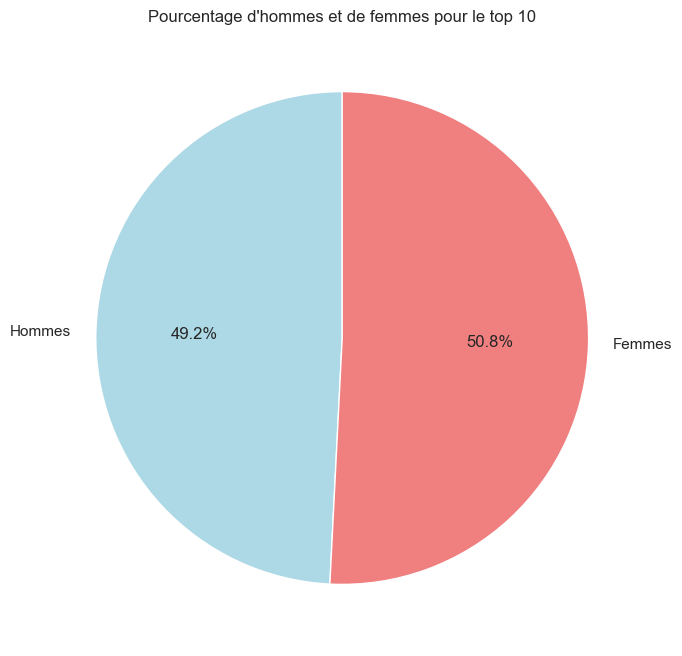

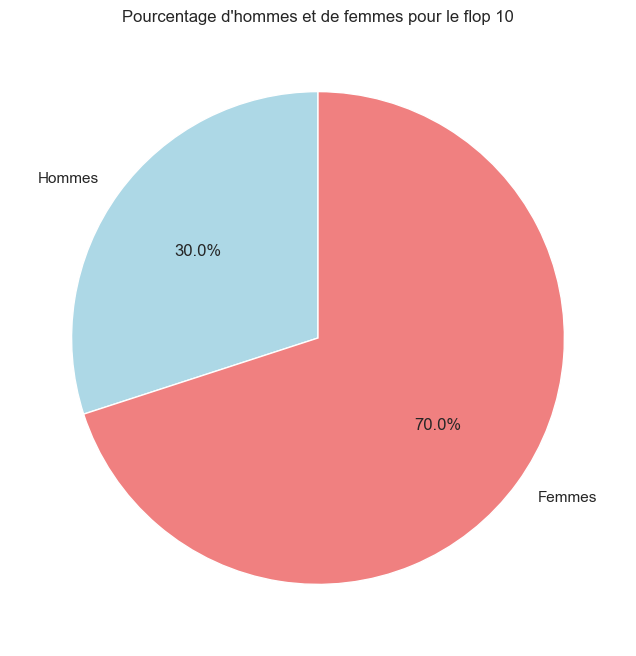

In [29]:
import matplotlib.pyplot as plt

#Fonction pour créer un camembert avec les pourcentages
def pie_chart(data, title):
    labels = data.index
    sizes = data.values
    colors = ['lightblue', 'lightcoral']
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

#Calculer le pourcentage d'hommes et de femmes pour le top 10
pourcentage_hommes_top = info_top_produits['nombre_hommes'].sum() / info_top_produits['nombre_ventes'].sum() * 100
pourcentage_femmes_top = info_top_produits['nombre_femmes'].sum() / info_top_produits['nombre_ventes'].sum() * 100

#Calculer le pourcentage d'hommes et de femmes pour le flop 10
pourcentage_hommes_flop = info_flop_produits['nombre_hommes'].sum() / info_flop_produits['nombre_ventes'].sum() * 100
pourcentage_femmes_flop = info_flop_produits['nombre_femmes'].sum() / info_flop_produits['nombre_ventes'].sum() * 100

#Créer les camemberts
pie_chart(pd.Series({'Hommes': pourcentage_hommes_top, 'Femmes': pourcentage_femmes_top}), "Pourcentage d'hommes et de femmes pour le top 10")
pie_chart(pd.Series({'Hommes': pourcentage_hommes_flop, 'Femmes': pourcentage_femmes_flop}), "Pourcentage d'hommes et de femmes pour le flop 10")


50.8% des clients positionnés sur les 10 produits les plus consommés sont des femmes. Elles représentent cependant 70% de la part client des flops. 100% des produits en tops sont de catégorie 1, et 90% des produits en flops sont de catégorie 0 : aucun de catégorie 1. 

II - 2) CATEGORIES

,categ,price
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


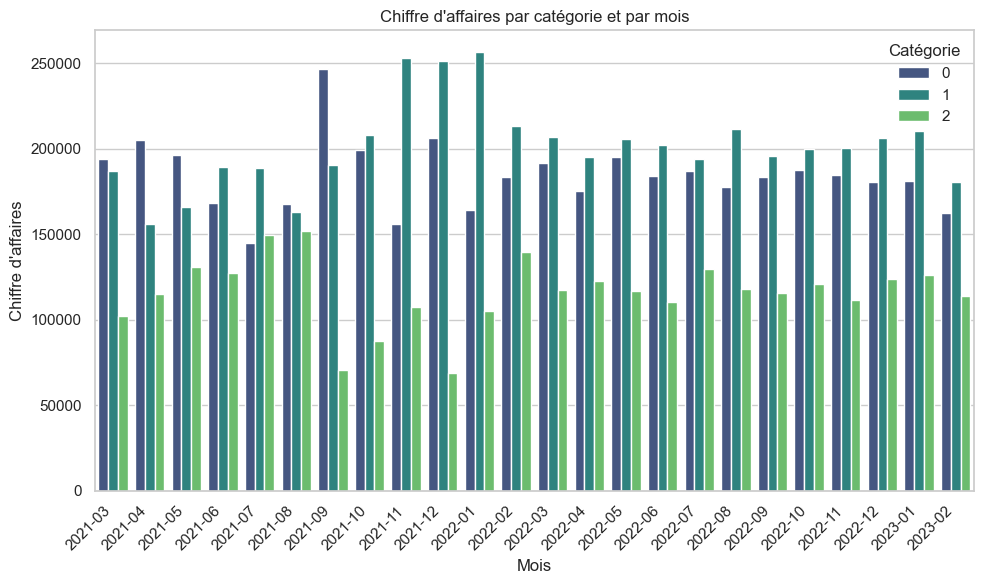

In [29]:
#Grouper les données par catégorie et calculer le chiffre d'affaires pour chaque catégorie
ca_categ = lapage.groupby('categ')['price'].sum().reset_index()

#Afficher le chiffre d'affaires par catégorie
display(ca_categ)

import seaborn as sns

#Grouper les données par mois, catégorie et calculer le chiffre d'affaires pour chaque catégorie
ca_monthly = lapage.groupby(['datetime', 'categ'])['price'].sum().reset_index()

#Afficher le chiffre d'affaires par catégorie sous forme de diagramme à barres avec couleurs différentes
plt.figure(figsize=(10, 6))
sns.barplot(x=ca_monthly['datetime'].dt.strftime('%Y-%m'), y='price', hue='categ', data=ca_monthly, palette='viridis')

plt.xticks(rotation=45, ha='right')  

plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires")
plt.title("Chiffre d'affaires par catégorie et par mois")
plt.legend(title='Catégorie')
plt.tight_layout()  
plt.show()

La répartition entre catégories est assez inégale, ce qui nous amène à calculer la proportion

,categ,proportion
0,0,0.367464
1,1,0.401379
2,2,0.231157


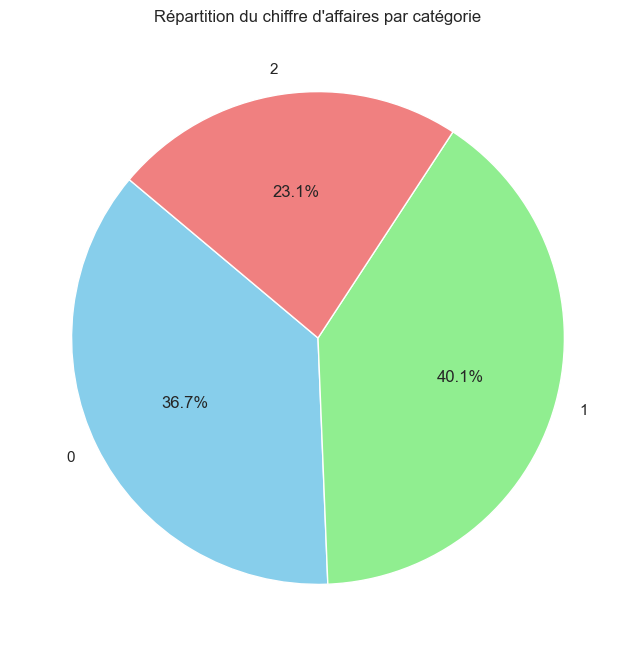

In [30]:
#Calculer la proportion du chiffre d'affaires total par catégorie
ca_categ['proportion'] = ca_categ['price'] / ca_categ['price'].sum()

#Afficher la proportion du chiffre d'affaires total par catégorie
display(ca_categ[['categ', 'proportion']])

#Camembert
plt.figure(figsize=(8, 8))
plt.pie(ca_categ['proportion'], labels=ca_categ['categ'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("Répartition du chiffre d'affaires par catégorie")
plt.show()

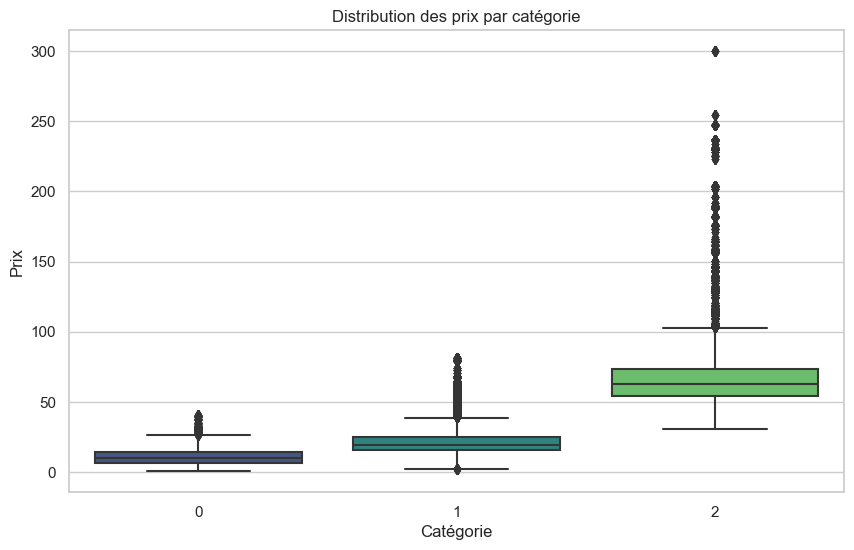

In [32]:
#Visualiser la distribution des prix par catégorie
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='price', data=lapage, palette='viridis')
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.title('Distribution des prix par catégorie')
plt.show()

On observe deux choses : les livres de catégorie 2 sont globalement nettement plus chers que ceux des deux autres catégories ; et on observe surtout de potentielles valeurs aberrantes : nous allons nous pencher dessus en profondeur. 

In [33]:
#Importer la fonction zscore de scipy.stats pour calculer le z-score
from scipy.stats import zscore

#Calculer le z-score pour la colonne 'price'
lapage['z_score'] = zscore(lapage['price'])

#Sélectionner les valeurs aberrantes (z-score supérieur à 3 ou inférieur à -3)
aberrant_values = lapage[(lapage['z_score'] > 3) | (lapage['z_score'] < -3)]

#Sélectionner les colonnes 'id_prod', 'price', et 'z_score' pour les valeurs aberrantes
aberrant_values_subset = aberrant_values[['id_prod', 'price', 'z_score', 'categ']]

#Supprimer les duplicatas basés sur 'id_prod'
unique_aberrant = aberrant_values_subset.drop_duplicates(subset=['id_prod'])
unique_aberrant_df = pd.DataFrame(unique_aberrant)

#Afficher le DataFrame des valeurs aberrantes uniques
display("Valeurs aberrantes :", aberrant_values_subset)
display("Valeurs aberrantes pour id unique:",unique_aberrant_df)

'Valeurs aberrantes :'

,id_prod,price,z_score,categ
31048,2_153,139.99,6.716411,2
31049,2_153,139.99,6.716411,2
31050,2_153,139.99,6.716411,2
31051,2_153,139.99,6.716411,2
31052,2_153,139.99,6.716411,2
...,...,...,...,...
687516,2_114,85.89,3.750130,2
687517,2_114,85.89,3.750130,2
687521,2_93,78.99,3.371806,2
687522,2_93,78.99,3.371806,2


'Valeurs aberrantes pour id unique:'

,id_prod,price,z_score,categ
31048,2_153,139.99,6.716411,2
68197,2_162,102.82,4.678395,2
178424,2_217,102.99,4.687716,2
179830,2_150,157.63,7.683605,2
212659,2_200,115.75,5.387342,2
...,...,...,...,...
687385,2_68,88.29,3.881721,2
687408,2_78,167.49,8.224225,2
687510,2_114,85.89,3.750130,2
687521,2_93,78.99,3.371806,2


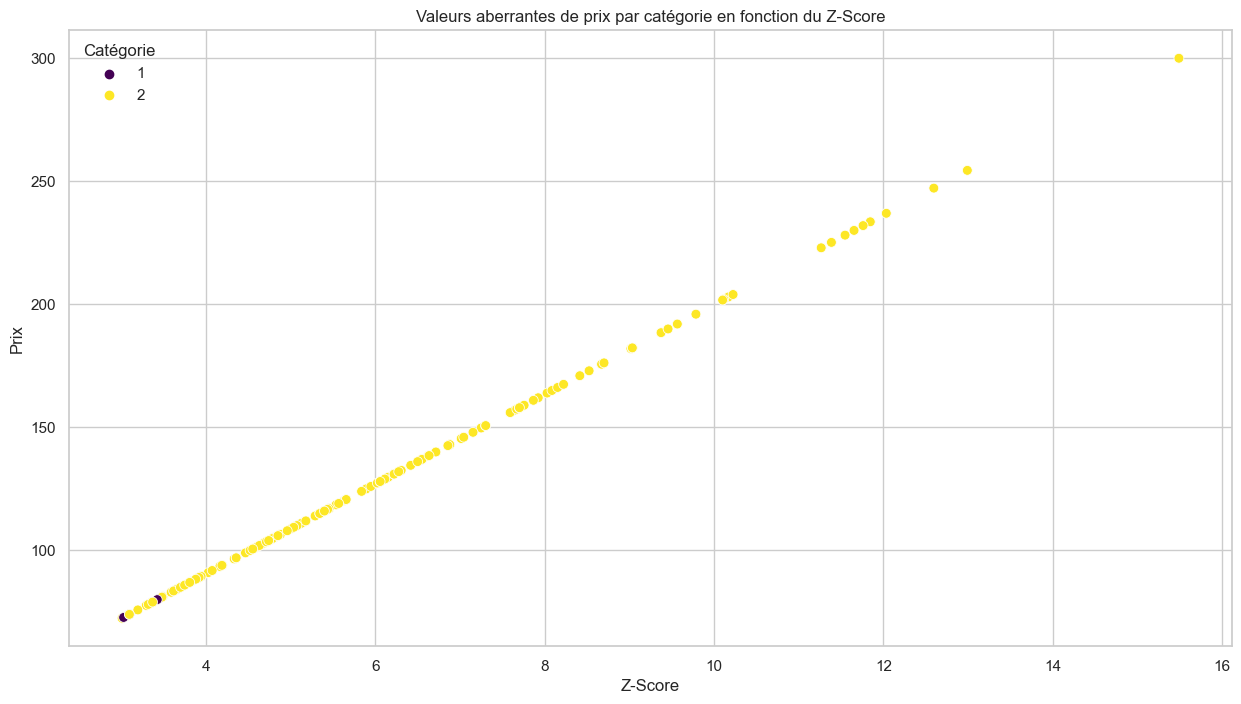

In [34]:
#Créer un diagramme à points pour les valeurs aberrantes uniques
plt.figure(figsize=(15, 8))
sns.scatterplot(x=unique_aberrant_df['z_score'], y=unique_aberrant_df['price'], hue=unique_aberrant_df['categ'], palette='viridis', s=50)
plt.xlabel('Z-Score')
plt.ylabel('Prix')
plt.title('Valeurs aberrantes de prix par catégorie en fonction du Z-Score')
plt.legend(title='Catégorie')
plt.show()

L'analyse suggère que la catégorie 2 présente des valeurs aberrantes de prix, indiquant des livres nettement plus chers que les autres catégories. Ce qui laisse connoter une politique de tarification agressive pour les produits du haut de panier dans cette catégorie ; des ajustements de tarification ou des actions correctives pourraient être envisagés une fois que ces facteurs auront été examinés en détail.

In [35]:
#Afficher le nombre de valeurs aberrantes par catégorie
aberrant_count_categ = aberrant_values_subset['categ'].value_counts().reset_index()
aberrant_count_categ.columns = ['categ', 'nombre de valeurs aberrantes']

#Afficher le DataFrame
display(aberrant_count_categ)

,categ,nombre de valeurs aberrantes
0,2,9189
1,1,270


In [93]:
#Copie et table pivot regroupant la somme des prix par client et catégorie 
clients1 = lapage.copy()
clients1 = clients1.pivot_table(index = "client_id",columns='categ', values='price', aggfunc= 'sum')
clients1 = clients1.reset_index()
clients1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  8600 non-null   object 
 1   0          7896 non-null   float64
 2   1          8459 non-null   float64
 3   2          3597 non-null   float64
dtypes: float64(3), object(1)
memory usage: 268.9+ KB


In [94]:
#Vérification des paniers clients par catégories
clients1[0.0].fillna(0, inplace=True)
clients1[1.0].fillna(0, inplace=True)
clients1[2.0].fillna(0, inplace=True)

#Somme cumulée des prix pour chaque client dans la variable 'total'
clients1['total'] = clients1[0]+clients1[1]+clients1[2]

#Trier par ordre décroissant
clients1 = clients1.sort_values('total')

#Afficher
display(clients1.tail(10))

categ,client_id,0,1,2,total
7715,c_7959,3467.40,1668.35,0.00,5135.75
7006,c_7319,2936.17,2175.61,43.99,5155.77
2108,c_2899,25.38,779.01,4409.66,5214.05
1268,c_2140,3360.28,1753.91,145.99,5260.18
2513,c_3263,3399.29,1877.58,0.00,5276.87
634,c_1570,2812.80,2327.03,145.99,5285.82
2724,c_3454,28779.69,84055.66,1275.22,114110.57
6337,c_6714,57254.59,73566.22,23097.79,153918.60
4388,c_4958,48.76,39841.93,250336.34,290227.03
677,c_1609,214447.24,110091.44,1501.21,326039.89


Les 4 derniers clients ont des dépenses gargantuesques, ce qui démontre que ce ne sont pas des clients ordinaires : plusieurs hypothèses sont possibles, mais il faut donc les exclures de notre analyse.

In [95]:
#ID clients à supprimer
clients_a_supprimer = ['c_3454', 'c_6714', 'c_4958', 'c_1609']

#Filtrer les lignes correspondantes dans le DataFrame lapage
clients_a_supprimer_df = lapage[lapage['client_id'].isin(clients_a_supprimer)]

#Afficher les clients à supprimer
print("Clients à supprimer :")
print(clients_a_supprimer_df)

#Créer le DataFrame lapage_pro avec les clients à supprimer
lapage_pro = clients_a_supprimer_df.copy()

#Supprimer les lignes correspondantes dans le DataFrame lapage
lapage = lapage[~lapage['client_id'].isin(clients_a_supprimer)]

#Afficher le DataFrame lapage_pro avec les clients supprimés
display(lapage_pro)

Clients à supprimer :
       id_prod                        date session_id client_id sex  birth  \
2       0_1259  2021-03-04 07:26:01.343183     s_1519    c_1609   m   1980   
48      0_1259  2021-06-24 09:40:37.526181    s_53058    c_1609   m   1980   
49      0_1259  2021-06-24 14:40:37.428842    s_53165    c_1609   m   1980   
93      0_1259  2021-09-26 21:30:08.966835    s_96014    c_1609   m   1980   
102     0_1259  2021-10-16 03:22:15.039429   s_105418    c_1609   m   1980   
...        ...                         ...        ...       ...  ..    ...   
687360   0_419  2023-01-12 06:32:43.023446   s_325700    c_1609   m   1980   
687361   0_419  2023-02-12 06:32:43.023446   s_340418    c_1609   m   1980   
687426  0_1871  2021-11-01 07:26:17.783922   s_113092    c_1609   m   1980   
687456   1_494  2021-11-13 21:02:17.925430   s_119195    c_4958   m   1999   
687459   1_494  2022-12-13 21:02:17.925430   s_311568    c_4958   m   1999   

        price  categ   datetime  year  ag

,id_prod,date,session_id,client_id,sex,birth,price,categ,datetime,year,age,tranche_age,panier_moyen
2,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0,2021-03-01,2021,41,Adultes (31-50),12.742902
48,0_1259,2021-06-24 09:40:37.526181,s_53058,c_1609,m,1980,11.99,0,2021-06-01,2021,41,Adultes (31-50),12.742902
49,0_1259,2021-06-24 14:40:37.428842,s_53165,c_1609,m,1980,11.99,0,2021-06-01,2021,41,Adultes (31-50),12.742902
93,0_1259,2021-09-26 21:30:08.966835,s_96014,c_1609,m,1980,11.99,0,2021-09-01,2021,41,Adultes (31-50),12.742902
102,0_1259,2021-10-16 03:22:15.039429,s_105418,c_1609,m,1980,11.99,0,2021-10-01,2021,41,Adultes (31-50),12.742902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687360,0_419,2023-01-12 06:32:43.023446,s_325700,c_1609,m,1980,20.99,0,2023-01-01,2023,43,Adultes (31-50),12.742902
687361,0_419,2023-02-12 06:32:43.023446,s_340418,c_1609,m,1980,20.99,0,2023-02-01,2023,43,Adultes (31-50),12.742902
687426,0_1871,2021-11-01 07:26:17.783922,s_113092,c_1609,m,1980,1.99,0,2021-11-01,2021,41,Adultes (31-50),12.742902
687456,1_494,2021-11-13 21:02:17.925430,s_119195,c_4958,m,1999,49.16,1,2021-11-01,2021,22,Jeunes (17-30),55.577754


<Figure size 2800x600 with 0 Axes>

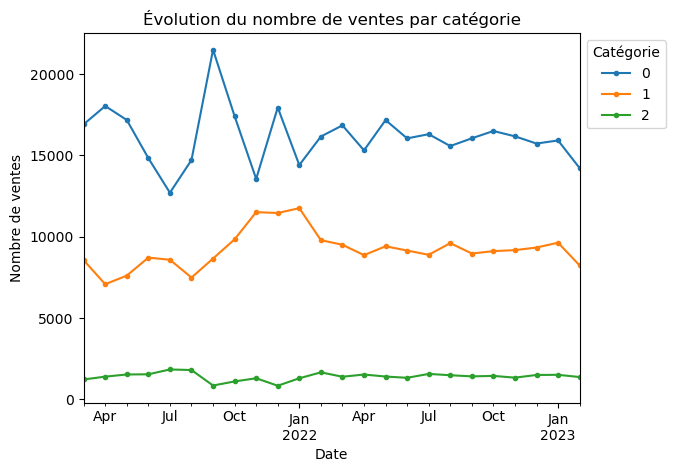

<Figure size 2800x600 with 0 Axes>

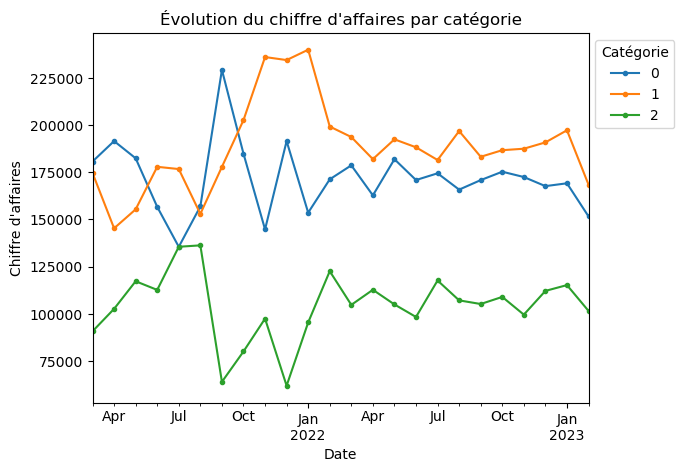

In [9]:
#Création d'un DataFrame pour stocker le nombre de ventes par catégorie
ventes_par_categorie = lapage.groupby(['datetime', 'categ'])['session_id'].count().unstack()

#Tracer le graphique de ligne pour le nombre de ventes par catégorie
plt.figure(figsize=(28, 6))
ventes_par_categorie.plot.line(marker='o', linestyle='-', markersize=3)
plt.title("Évolution du nombre de ventes par catégorie")
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend(title='Catégorie', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Création d'un DataFrame pour stocker le chiffre d'affaires par catégorie
ca_par_categorie = lapage.groupby(['datetime', 'categ'])['price'].sum().unstack()

#Tracer le graphique de ligne pour le chiffre d'affaires par catégorie
plt.figure(figsize=(28, 6))
ca_par_categorie.plot.line(marker='o', linestyle='-', markersize=3)
plt.title("Évolution du chiffre d'affaires par catégorie")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend(title='Catégorie', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Nous pouvons remarquer que, si le nombre de ventes sur les livres de catégorie 0 est de loin le plus haut, ce n'est nullement pour autant la catégorie de livre la plus rentable : en observant ensuite l'évolution du Chiffre D'affaire par catégorie, on remarque que les livres de catégorie 1 sont clairement les plus rentables.

On remarque même que le chiffre d'affaire des ventes de livres de catégorie 2 en juillet est égal à celui des livres de catégorie 0 ; les livres de catégorie 2 étant de loin les moins vendus. 

Nous nous intéresserons, sur la partie tests, au rapport entre le sexe et le choix des catégories, ainsi qu'entre l'âge et le choix des catégories, afin de mieux comprendre ces différences et de trouver(ou non) d'éventuels rapports.

Nous pouvons passer aux tests.

III - PARTIE TESTS 

Concernant la requête de Julie, nous devons aborder 5 liens de corrélations : 
1) Lien entre le genre d'un client et les catégories de livres achetés
2) Lien entre l'âge des clients et le montant total des achats
3) Lien entre l'âge des clients et la fréquence d'achat
4) Lien entre l'âge des clients et la taille du panier moyen
5) Lien entre l'âge des clients et la catégorie de livres achetés

PARTIE 1 : LIEN ENTRE LE GENRE D'UN CLIENT ET LES CATEGORIES DE LIVRES ACHETES

Les 2 variables sont catégorielles et pour vérifier et appuyer notre analyse concernant le lien entre le genre d'un client et les catégories de livres achetés, on visualise d'abord la distribution, puis on passe au test du Chi². Il permet de déterminer si la distribution des observations diffère de ce à quoi on pourrait s'attendre par pur hasard. Le Coefficient de Cramer mesure la force de l'association entre les deux variables.

In [248]:
#Regroupement des clients par catégories 
display(lapage.groupby('categ')['client_id'].nunique())

categ
0    7892
1    8455
2    3593
Name: client_id, dtype: int64

In [249]:
#Répartition des sexes dans ce regroupement et parts
lapage.groupby(['sex','categ'])['client_id'].nunique()
pourcentages = lapage.groupby(['sex', 'categ'])['client_id'].nunique().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='pourcentage')

#Afficher la répartition et la proportion
display(lapage.groupby(['sex','categ'])['client_id'].nunique())
display(round(pourcentages, 2))

C:\Users\djaba\AppData\Local\Temp\ipykernel_17980\4134669647.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pourcentages = lapage.groupby(['sex', 'categ'])['client_id'].nunique().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='pourcentage')


sex  categ
f    0        4119
     1        4394
     2        1839
m    0        3773
     1        4061
     2        1754
Name: client_id, dtype: int64

,sex,categ,pourcentage
0,f,0,39.79
1,f,1,42.45
2,f,2,17.76
3,m,0,39.35
4,m,1,42.36
5,m,2,18.29


sex,%femme,%homme
categ,,
0,52.0,48.0
1,52.0,48.0
2,52.0,48.0


2

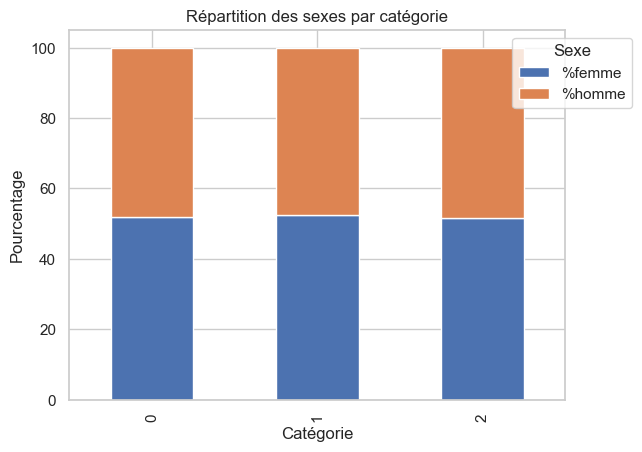

In [250]:
#Regrouper par catégories et sexe
sexe_categ = lapage.groupby(['categ', 'sex']).size().unstack()

#Calculer les pourcentages
sexe_categ['total'] = sexe_categ['f'] + sexe_categ['m']
sexe_categ['%femme'] = (sexe_categ['f'] / sexe_categ['total']) * 100
sexe_categ['%homme'] = (sexe_categ['m'] / sexe_categ['total']) * 100

#Afficher les résultats
display(round(sexe_categ[['%femme', '%homme']]), 2)

#Diagramme pourcentages d'hommes et de femmes par catégorie
sexe_categ[['%femme', '%homme']].plot(kind='bar', stacked=True)

#Labels et titre
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage')
plt.title('Répartition des sexes par catégorie')
plt.legend(title='Sexe', loc='upper right', bbox_to_anchor=(1.15, 1))

#Afficher le graphique
plt.show()

Avant exlusion des 4 potentiels clients B2B, les hommes étaient plus représentés que les femmes en catégorie 2, mais depuis ce changement significatif, les femmes l'emportent pour chaque catégorie.

p-valeur du Chi² : Évalue la probabilité d'obtenir une différence aussi importante entre les fréquences observées et attendues 
- Si la p-valeur est faible (< 0,05), on rejette l'hypothèse nulle d'indépendance entre les variables.
- Si la p-valeur est élevée, on ne peut pas rejeter l'hypothèse nulle.

Coefficient de contingence de Cramer : Après avoir effectué le test du khi-deux, le coefficient de contingence de Cramer peut être calculé pour mesurer la force de l'association entre les deux variables. Il varie de 0 à 1, où 0 signifie aucune association et 1 signifie une association parfaite.

In [251]:
from scipy.stats import chi2_contingency

#Créer la table de contingence
table = pd.crosstab(lapage["sex"], lapage["categ"])

#Effectuer le test du khi2
chi2, p, dof, expected = chi2_contingency(table)

#Calculer le coefficient de Cramer
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_v = cramers_v(table)

#Afficher les résultats
print(f"Test du khi2 : Stat de test = {chi2}, p-valeur = {p}, degrés de liberté = {dof}")
print(f"Coefficient de Cramer : {cramer_v}")

Test du khi2 : Stat de test = 22.66856665178056, p-valeur = 1.1955928116587024e-05, degrés de liberté = 2
Coefficient de Cramer : 0.00567958496599581


Bien que le test du khi-deux suggère une significativité statistique (>0.05) induisant que l'on rejette l'hypothèse nulle, le coefficient de Cramer indique une association faible (0.005). Mais même si cette association peut être limitée, il est clair que ces variables restent liées de manière statistiquement significative. 

Pour la catégorie 1 par exemple, le ratio est de 52% de femmes contre 48% d'hommes : en vérifiant les données, la différence se compte en plusieures centaines d'individus. Sur un échantillon de plusieurs milliers(ou plus) de personnes, ces différences peuvent donc avoir un poids considérable.

PARTIE 2 : LIEN ENTRE L'AGE DES CLIENTS ET LE MONTANT TOTAL DES ACHATS

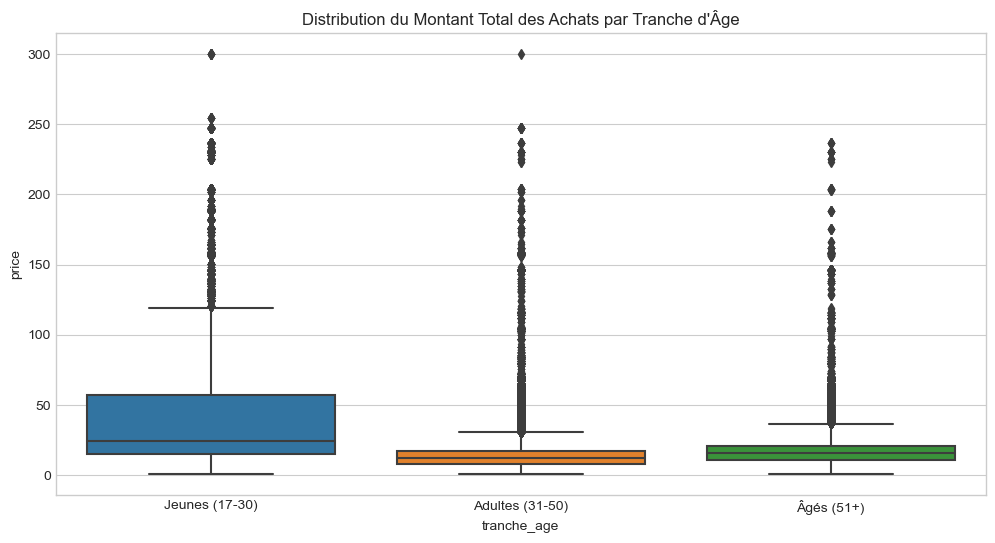

In [95]:
#Utilise seaborn pour un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='tranche_age', y='price', data=lapage)
plt.title('Distribution du Montant Total des Achats par Tranche d\'Âge')
plt.show()

Après avoir visualisé la répartition en boxplot, le test parfait pour du quali-quanti serait l'ANOVA ; mais nous allons tester en amont l'égalité des variances : le test de levene.

In [16]:
from scipy.stats import levene

#Exclure les lignes avec des valeurs NaN
lapage_cleaned = lapage.dropna(subset=['tranche_age', 'price'])

#Test de Levene pour l'homoscédasticité
stat_levene, p_value_levene = levene(*[lapage_cleaned['price'][lapage_cleaned['tranche_age'] == tranche] for tranche in lapage_cleaned['tranche_age'].unique()], center='mean')

print(f"Statistique de Levene : {stat_levene}")
print(f"P-valeur de Levene : {p_value_levene}")

Statistique de Levene : 113989.83169650355
P-valeur de Levene : 0.0


La statistique de Levene est significativement élevée, et la p-valeur est très proche de zéro (0.0). Cela indique que nous avons suffisamment de preuves pour rejeter l'hypothèse nulle, suggérant que les variances des montants totaux d'achats ne sont pas égales entre les différentes tranches d'âge.

Cela signifie que l'homoscédasticité n'est pas respectée, ce qui peut affecter la validité des résultats de l'ANOVA. Dans ce cas, nous pourrions utiliser une approche alternative, comme l'ANOVA de Welch, qui est robuste aux violations de l'homoscédasticité

In [99]:
import pingouin as pg

#ANOVA de Welch
anova_result = pg.welch_anova(data=lapage, dv='price', between='tranche_age')

#Afficher les résultats
print(anova_result)


        Source  ddof1         ddof2             F  p-unc      np2
0  tranche_age      2  160165.37653  21068.422398    0.0  0.20363


Les résultats de l'ANOVA de Welch indiquent à nouveau une p valeur p nulle, suggérant une différence statistiquement significative entre les groupes. La statistique F et les degrés de liberté (ddof1 et ddof2) montrent des valeurs inhabituelles, mais la valeur d'η² (np2) est de 0.20363, indiquant une taille d'effet modérée.

PARTIE 3 : LIEN ENTRE L'ÂGE DES CLIENTS ET LA FREQUENCE D'ACHAT 

,age,frequence_nb_achat,tranche_age
0,17,3567,Jeunes (17-30)
6283,18,5529,Jeunes (17-30)
16039,19,3179,Jeunes (17-30)
21574,20,2573,Jeunes (17-30)
26130,21,2490,Jeunes (17-30)
...,...,...,...
639920,90,162,Âgés (51+)
640163,91,122,Âgés (51+)
640385,92,142,Âgés (51+)
640582,93,86,Âgés (51+)


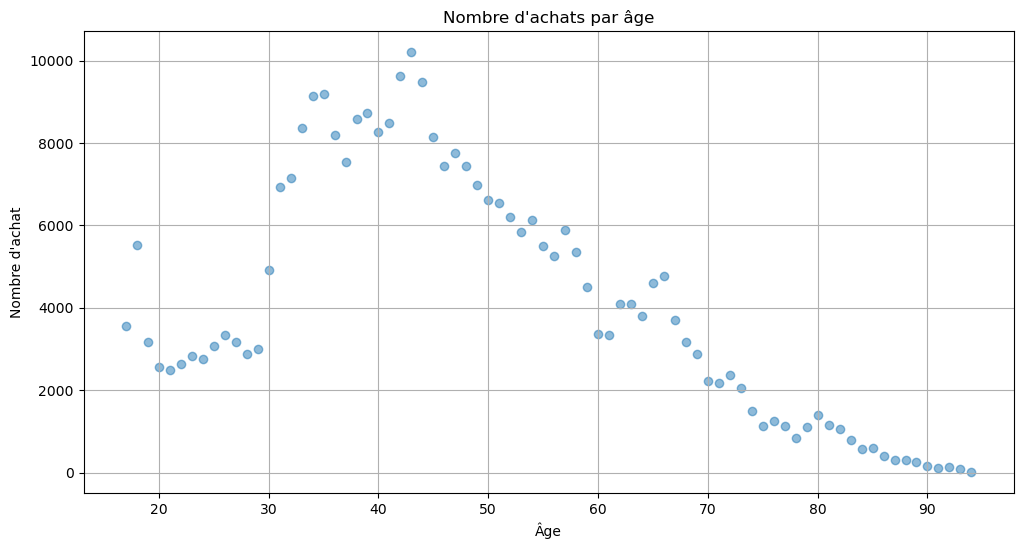

In [15]:
#Calcul du nombre de session_id par âge
freq_age = lapage.groupby('age')['session_id'].nunique().reset_index(name='frequence_nb_achat')

#Ajout des tranches d'âge
freq_age = pd.merge(freq_age, lapage[['age', 'tranche_age']], on='age', how='left').drop_duplicates()

#Afficher le DataFrame
display(freq_age)

#Tracer le nuage de points du nombre de sessions par âge
plt.figure(figsize=(12, 6))
plt.scatter(freq_age['age'], freq_age['frequence_nb_achat'], alpha=0.5)
plt.title("Nombre d'achats par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achat")
plt.grid(True)
plt.show()

Encore une fois, certains comportements clients dévoilent des groupes +- homogènes : l'écrasante majorité des 17-30 se situent en dessous du seuil de 4000 sessions ; les 31-50 sont tous situés au dessus de 6000, avec un maximum pour les 43 ans (>10000). La quasi totalité des +51 ans sont en dessous des 6000, avec une majorité en dessous des 4000 au fur et à mesure que l'âge croît. Il serait donc intéressant de vérifier le nombre d'achats totaux pour chaque tranche.

In [15]:
#Calcul du nombre total d'achats par client
achats_par_client = lapage.groupby('client_id')['session_id'].nunique().reset_index(name='nombre_achats')

#Fusionner avec les données d'âge
donnees_age_achats = pd.merge(lapage[['client_id', 'age', 'tranche_age']], achats_par_client, on='client_id', how='inner')

#Calcul du nombre total d'achats par tranche d'âge
total_achats_age = donnees_age_achats.groupby('tranche_age')['nombre_achats'].sum()

#Afficher
display(donnees_age_achats)
display(total_achats_age)

,client_id,age,tranche_age,nombre_achats
0,c_329,54,Âgés (51+),35
1,c_329,55,Âgés (51+),35
2,c_329,55,Âgés (51+),35
3,c_329,56,Âgés (51+),35
4,c_329,54,Âgés (51+),35
...,...,...,...,...
640729,c_7739,25,Jeunes (17-30),3
640730,c_7739,25,Jeunes (17-30),3
640731,c_712,54,Âgés (51+),2
640732,c_712,55,Âgés (51+),2


tranche_age
Jeunes (17-30)      1851387
Adultes (31-50)    28427987
Âgés (51+)         10446735
Name: nombre_achats, dtype: int64

Le test étant quali-quanti, nous pouvons maintenant procéder à un test d'égalité des variances

In [16]:
#Diviser les données en groupes selon les tranches d'âge
groupes_frequence = [group['frequence_nb_achat'] for name, group in freq_age.groupby('tranche_age')]

#Test d'homogénéité des variances
levene_stat, levene_pvalue = levene(*groupes_frequence)
print("Test de Levene - Statistique :", levene_stat)
print("Test de Levene - Valeur p :", levene_pvalue)

Test de Levene - Statistique : 13.295979078647738
Test de Levene - Valeur p : 1.1660922873996028e-05


La p-value étant extrêmement faible(>0.05), l'homoscédasticité n'est pas respectée, ce qui peut affecter la validité des résultats de l'ANOVA. Dans ce cas, même chose : optons pour l'ANOVA de Welch, robuste aux violations de l'homoscédasticité

In [28]:
import pingouin as pg

#ANOVA de Welch
anova_result = pg.welch_anova(data=freq_age, dv='frequence_nb_achat', between='tranche_age')

#Afficher les résultats
print(anova_result)

        Source  ddof1      ddof2           F         p-unc       np2
0  tranche_age      2  42.856288  126.421373  1.060023e-18  0.645582


Les résultats indiquent que la statistique de test F est significative (p-value très faible), ce qui suggère qu'il existe des différences significatives entre les groupes d'âge en termes de fréquence d'achats : on rejette l'hypothèse nulle.
L'effet size (np2) de 0.645582 indique une taille d'effet importante, ce qui signifie que l'âge a une influence considérable sur la fréquence d'achats.

In [27]:
#Calculer la fréquence d'achat par tranche d'âge
frequence_achat_par_tranche = lapage['tranche_age'].value_counts(normalize=True)

#Afficher les résultats
print(frequence_achat_par_tranche)

Adultes (31-50)    0.609159
Âgés (51+)         0.277217
Jeunes (17-30)     0.113624
Name: tranche_age, dtype: float64


PARTIE 4 : LIEN ENTRE L'AGE DES CLIENTS ET LA TAILLE DU PANIER MOYEN

In [96]:
#Calculer le panier moyen par client et ajouter la variable
lapage['panier_moyen'] = lapage.groupby('client_id')['price'].transform('mean')

#Afficher le dataframe avec l'ajout
display(lapage)

C:\Users\djaba\AppData\Local\Temp\ipykernel_17372\1470961171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lapage['panier_moyen'] = lapage.groupby('client_id')['price'].transform('mean')


,id_prod,date,session_id,client_id,sex,birth,price,categ,datetime,year,age,tranche_age,panier_moyen
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,2021-03-01,2021,54,Âgés (51+),17.983175
1,0_1259,2021-03-01 10:27:10.675023,s_202,c_1599,m,1965,11.99,0,2021-03-01,2021,56,Âgés (51+),12.669524
3,0_1259,2021-03-05 13:32:43.907997,s_2114,c_107,f,1984,11.99,0,2021-03-01,2021,37,Adultes (31-50),13.378162
4,0_1259,2021-03-07 09:47:05.272864,s_2976,c_4215,f,1980,11.99,0,2021-03-01,2021,41,Adultes (31-50),11.105682
5,0_1259,2021-03-09 21:26:58.585264,s_4088,c_174,m,1991,11.99,0,2021-03-01,2021,30,Adultes (31-50),13.223750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,0_1576,2022-10-20 21:09:34.520763,s_285542,c_7954,m,1973,2.29,0,2022-10-01,2022,49,Adultes (31-50),13.311608
687530,0_433,2022-02-21 06:11:31.176502,s_168499,c_8069,f,1975,2.99,0,2022-02-01,2022,47,Adultes (31-50),13.526735
687531,0_433,2022-06-21 06:11:31.176502,s_226925,c_8069,f,1975,2.99,0,2022-06-01,2022,47,Adultes (31-50),13.526735
687532,0_433,2022-08-21 06:11:31.176502,s_256286,c_8069,f,1975,2.99,0,2022-08-01,2022,47,Adultes (31-50),13.526735


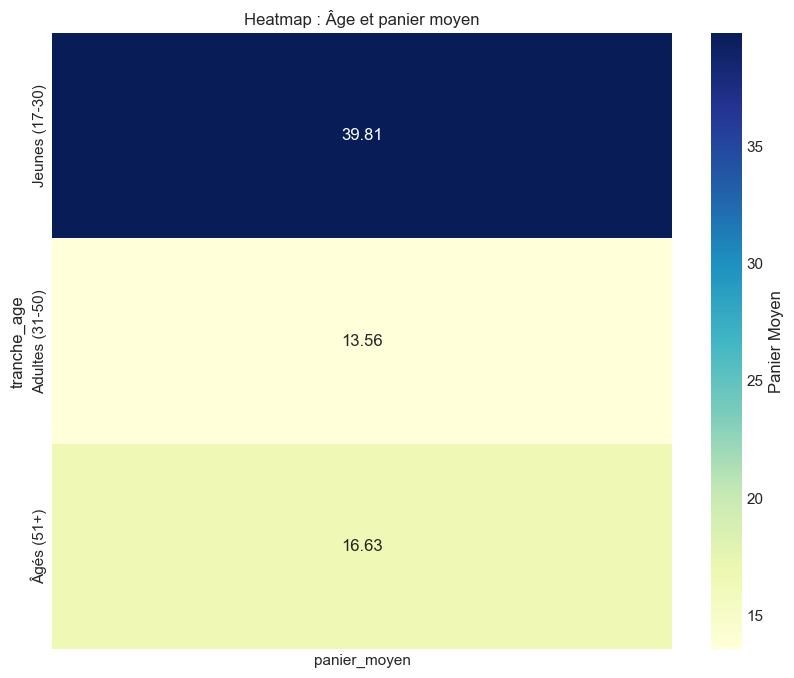

In [97]:
#Heatmap : visualisation du panier moyen en fonction de la tranche d'âge
heatmap_data = lapage[['tranche_age', 'panier_moyen']]

#Créer la heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='tranche_age', values='panier_moyen', aggfunc='mean'), cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Panier Moyen'})
plt.title('Heatmap : Âge et panier moyen')
plt.show()

On observe bien qu'ici, les jeunes sont sur-représentés : bien que clients moins "fréquents", ils dépensent moyennement beaucoup plus. On va cependant procéder à un test de levene afin de vérifier la très certaine hétéroscédasticité.

In [98]:
from scipy.stats import levene

#Créer des séries pour chaque tranche d'âge
jeunes = lapage['panier_moyen'][lapage['tranche_age'] == 'Jeunes (17-30)']
adultes = lapage['panier_moyen'][lapage['tranche_age'] == 'Adultes (31-50)']
ages_51_plus = lapage['panier_moyen'][lapage['tranche_age'] == 'Âgés (51+)']

#Appliquer le test de Levene
stat_levene_panier, p_value_levene_panier = levene(jeunes, adultes, ages_51_plus, center='mean')

print(f"Statistique de Levene pour la taille du panier moyen : {stat_levene_panier}")
print(f"P-valeur de Levene pour la taille du panier moyen : {p_value_levene_panier}")

Statistique de Levene pour la taille du panier moyen : 214065.67328063052
P-valeur de Levene pour la taille du panier moyen : 0.0


La statistique de Levene est cette-fois très élevée, indiquant une plus grande différence entre les variances des groupes ; le tout associé à une p-valeur extrêmement faible voir nulle. Cela laisse supposer une forte heterodascticitée ; il vaut mieux opter pour le test de Kruskal wallis

In [99]:
from scipy.stats import kruskal

#Appliquer le test de Kruskal-Wallis
stat_kruskal_panier, p_value_kruskal_panier = kruskal(jeunes, adultes, ages_51_plus)

print(f"Statistique de Kruskal-Wallis pour la taille du panier moyen : {stat_kruskal_panier}")
print(f"P-valeur de Kruskal-Wallis pour la taille du panier moyen : {p_value_kruskal_panier}")

Statistique de Kruskal-Wallis pour la taille du panier moyen : 371946.91912702925
P-valeur de Kruskal-Wallis pour la taille du panier moyen : 0.0


Encore une fois, la p-valeur extrêmement faible voir nulle démontre des différences statistiquement significatives dans la taille du panier moyen entre les groupes définis par les tranches d'âge. La variable 'tranche_age' semble avoir un impact significatif sur la taille du panier moyen ; comme nous le démontre visuellement également la heatmap.

Sans être pourtant globalement la tranche de clients la plus rentable, la tranche 17-30 est pourtant de loin la plus représentée, avec les panier moyens les plus hauts, ceci corrélant au fait que, hypothétiquement, c'est la tranche comportant le plus de célibataires/sans foyer à charge chez qui, généralement, le panier moyen est le plus élévé.

PARTIE 5 : LIEN ENTRE L'AGE DES CLIENTS ET LA CATEGORIE DE LIVRES ACHETES

Nous allons, en amont, observer la répartition des achats par catégories et par âge à l'aide d'une table de contingence

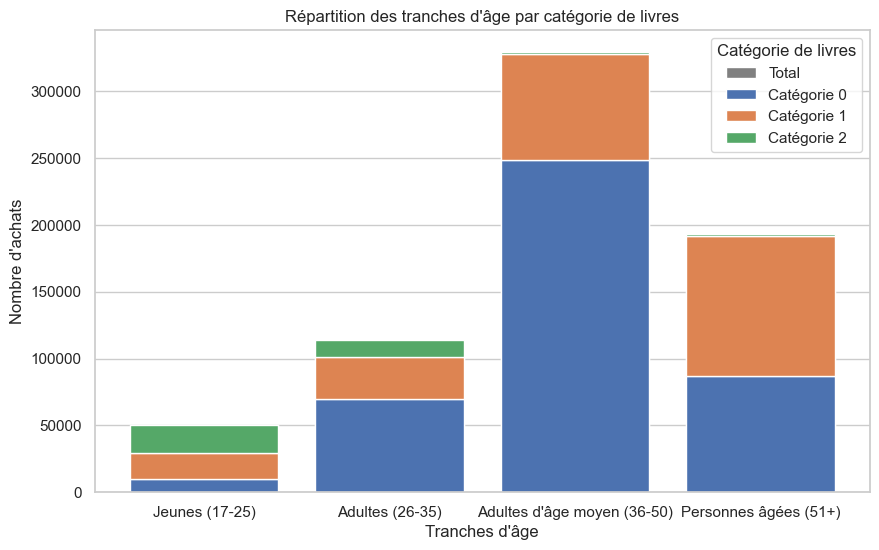

In [59]:
#Table de contingence
table_contingence = pd.crosstab(lapage['tranche_age'], lapage['categ'])

#Tracer le graphique en barres empilées
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=table_contingence.index, y=table_contingence.sum(axis=1), color='gray', label='Total')
bottom = 0

#Tracer les barres empilées pour chaque catégorie
for i in range(table_contingence.shape[1]):
    plt.bar(table_contingence.index, table_contingence.iloc[:, i], bottom=bottom, label=f'Catégorie {i}')
    bottom += table_contingence.iloc[:, i]

#Ajouter des étiquettes et des légendes
plt.title('Répartition des tranches d\'âge par catégorie de livres')
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'achats')
plt.legend(title='Catégorie de livres')
plt.show()

Catégorielles et plus de deux catégories chacunes : khi2 (et cramer)

In [38]:
from scipy.stats import chi2_contingency

#Créer la table de contingence
table = pd.crosstab(lapage['categ'], lapage['tranche_age'])

#Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(table)

#Calculer le coefficient de Cramer
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_v = cramers_v(table)

#Afficher les résultats
print(f"Test du chi2 : Stat de test = {chi2}, p-valeur = {p}, degrés de liberté = {dof}")
print(f"Coefficient de Cramer : {cramer_v}")

Test du chi2 : Stat de test = 254809.4954716374, p-valeur = 0.0, degrés de liberté = 4
Coefficient de Cramer : 0.44592208813357304


In [ ]:
La p-value étant extrêmement faible voir nulle, la corrélation est statistiquement significative.

A noter que la catégorie 2, la moins représentée, est celle comportant le plus de valeurs aberrantes également ; ce que l'on avait pu démontrer par l'intermédiaire de notre analyse du z-score. Il est donc impératif de se pencher sur la stratégie marketing et la stratégie de tarification utilisée sur les livres de cette catégorie.

CONCLUSION : en résumé, les tests ont été choisis en fonction de la nature des variables étudiées et des objectifs spécifiques de chaque analyse. Ils sont adaptés aux types de données et aux questions que l'on cherche à résoudre.

Bien que le sexe influe sur le choix des catégories de livres achetés par les Clients, c'est surtout l'âge qui semble jouer un rôle important dans la façon dont ils interagissent avec nos produits ou services. 

Certaines catégories de produits sont consommées seulement par une seule catégorie de tranche d'âge par exemple. Nous pencher sur ces divers détails peut nous aider à mieux comprendre nos clients et à adapter nos stratégies marketing en conséquence. 

De plus, si les plus jeunes (17-30) ont un panier moyen souvent supérieur au niveau du prix par rapport aux autres tranches d'ages, la fréquences d'achat est supérieure chez les deux autres. Ceci peut ouvrir bien évidemment la voie à diverses interprétations.

Par exemple, nous pourrions envisager des offres spéciales ou des communications ciblées pour certaines tranches d'âge, ce qui pourrait avoir un impact positif sur notre activité.